# Universidad Europea de Madrid - Master Big Data 2022-2023
# Procesamiento de Datos

## Práctica 4



Alumnos:
- Límber García Vílchez
- David Vázquez Argibay
- Javier Vázquez García


### Ejercicio 1. 

**Utiliza el siguiente enlace para descargar el Diabetes Dataset, junto con su
fichero de nombres. Utiliza un Jupyter Notebook y el paquete Pandas para
abrir el archivo y presentarlo en formato DataFrame, donde el nombre de las
columnas debe corresponder con el nombre real de las variables.
<https://www.kaggle.com/uciml/pima-indians-diabetes-database>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')

In [3]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**1.a. Utiliza el método info de Pandas sobre el DataFrame para comprobar que
todas las variables del problema son numéricas. ¿Cuántos valores
faltantes tiene cada variable?**

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
for col in df_diabetes: print(col, df_diabetes[col].unique())

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

Podemos ver que se reconocen todos los valores como numéricos int y float. No hay ningún null, ni ningún NaN.

**Explica el nombre y el significado de las
variables que aparecen en el dataset.** 

Copiamos la descripción encontrada en la fuente de datos:

- Pregnancies:  Number of times pregnant  => Número de embarazos.       
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test => concentración de glucosa en sangre tras 2 horas del test oral                  
- BloodPressure: Diastolic blood pressure (mm Hg) => Presión sanguínea diastólica          
- SkinThickness: Triceps skin fold thickness (mm)  => Grosor del pliego cutáneo del triceps        
- Insulin: 2-Hour serum insulin (mu U/ml) => Insulina sérica a las 2 horas.              
- BMI: Body mass index (weight in kg/(height in m)^2)  => Índice de Masa Corporal                    
- DiabetesPedigreeFunction: Diabetes pedigree function  => función hereditaria de diabetes
- Age: Age (years)   => Edad                      
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0 => 0 No tiene diabetes, 1 tiene diabetes.



**¿Tiene sentido que alguien tenga un índice de masa corporal o una presión sanguínea igual a cero?**

No, debe tratarse de una ausencia de medida.


**En las variables que corresponda, sustituye los valores que no tengan sentido por valores np.nan. Vuelve a utilizar el método info() de Pandas.
¿Cuántos valores faltantes aprecias ahora?**

Sólo pueden ser 0 la variable 'Pregnancies' y la target 'Outcome'.


In [6]:
df_diabetes_nan = df_diabetes.copy()

lista_columnas = df_diabetes_nan.columns
lista_columnas = lista_columnas[1:8]
df_diabetes_nan[lista_columnas] = df_diabetes_nan[lista_columnas].replace(0,np.nan)
df_diabetes_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Podemos ver que del total de 768 registros, sólo tenemos valores de glucosa para 763, valores de presión sanguínea para 733, valores de espesor de pliegues para 541, valores de insulina para 394, valores de BMI para 757. Para el resto de variables no tenemos ningún valor faltante.

**1.b. La mayoría de los métodos de Machine Learning no pueden tomar como datos de entrada datasets en los que haya valores faltantes. Para poder
usar estos datasets se pueden tomar dos enfoques. Uno de ellos es eliminar todos los registros en los que haya valores faltantes, de forma
que nos quedamos con un nuevo dataset de menor tamaño que el original. Este enfoque es rápido y sencillo, pero tiene inconvenientes. Si
el número de instancias con valores faltantes es grande, podemos quedarnos con un dataset demasiado pequeño. Además, es posible que
existan razones o correlaciones por los cuales los datos faltan, por lo que al eliminarlos estaríamos eliminando del dataset un tipo particular de
instancia que no se tendría en cuenta al entrenar el modelo, socavando su capacidad de predicción. Podemos comprobar esta circunstancia
haciendo algunos análisis estadísticos de los datos presentes y los datos faltantes.**

**Usando el DataFrame en el que los valores faltantes han sido marcados como np.nan, dibuja en una misma gráfica dos histogramas, ambos con
nivel de transparencia (alpha) igual a 0.7, y de forma que ambos sean de colores distintos. Uno de los histogramas corresponderá al histograma de
la variable “DiabetesPedrigreeFunction” de las instancias en las que “Insulin” tiene un valor numérico. El otro histograma corresponderá al
histograma de la variable “DiabetesPedrigreeFunction” de las instancias en las que el valor de “Insulin” es un valor faltante. ¿Ambos histogramas
son iguales? ¿Podemos pensar que los valores de “Insulin” son faltantes con independencia de cuál sea el valor de “DiabetesPedrigreeFunction”?**


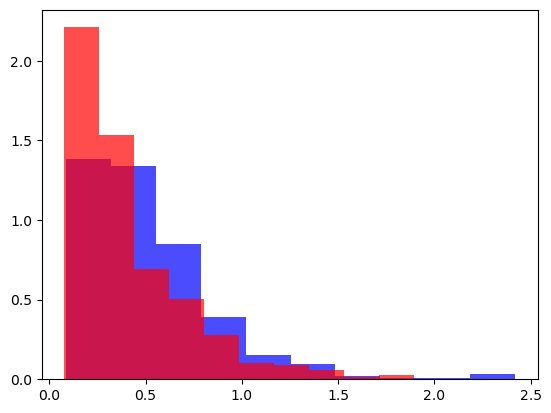

In [14]:
plt.hist(df_diabetes_nan[df_diabetes_nan['Insulin'].notnull()]['DiabetesPedigreeFunction'], color='blue', alpha= 0.7, density = True)
plt.hist(df_diabetes_nan[df_diabetes_nan['Insulin'].isnull()]['DiabetesPedigreeFunction'], color='red', alpha=0.7, density = True)
plt.show()

No, los histogramas no son iguales, pero siguen una distribución relativamente similar.

Sí, podemos considerar que los valores de "Insulin" son independientes del valor de "DiabetesPedrigreeFunction". Primero por la propia definición de las variables, una es una función hereditaria (historial médico familiar) y la otra es una medida realizada. Además en el histograma vemos que cuando 'Insulin' no tiene valor, "DiabetesPedrigreeFunction", puede tomar diferentes valores.

**1c. Otro de los enfoques que se pueden utilizar es el de imputar o rellenar
los valores faltantes del dataset. No existe una técnica general que nos
permita encontrar la mejor imputación de valores faltantes, pero existen algunos enfoques básicos que, por su sencillez, pueden ser las primeras ideas a aplicar cuando trabajamos con un dataset desconocido.
Permitiremos la presencia de valores faltantes tanto en el conjunto de
entrenamiento como en el de test. Sin embargo, hay un factor
imprescindible a tener en cuenta: debemos imputar los valores faltantes
en el conjunto de test de acuerdo a las reglas y parámetros establecidos
en el conjunto de entrenamiento. De lo contrario, estaríamos falseando la
capacidad predictora de nuestro modelo debido a un fenómeno conocido
como data leakage, en el que la predicción sobre el conjunto de test se
evalúa utilizando una información sobre el conjunto de la que no se va a
disponer cuando se aplique el modelo a instancias que provengan del
mundo real. Para evitar el data leakage utilizaremos la clase Pipeline de
Scikit Learn en la que se definirán dos pasos: primero el método de
imputación y después el modelo de Machine Learning con el que se
resolverá el problema.**

**En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando un valor constante igual a cero. Declara un objeto de la clase
SimpleImputer de Scikit Learn en el que el argumento “strategy” sea
igual a “constant”. Declara un objeto de la clase RandomForestClassifier
de Scikit Learn con los valores por defecto. Declara un objeto de la clase
Pipeline de Scikit Learn en el que en la variable “steps” se utilice primero
el objeto de SimpleImputer y después el objeto de
RandomForestClassifier. Declara un objeto de la clase StratifiedKFold en
el que la variable ‘n_splits’ sea igual a 10 y la variable “random_state”
sea igual a 42. Utiliza el método “cross_val_score” de Scikit Learn para
obtener 10 valores de la métrica del clasificador aplicado a este conjunto
de datos. En los argumentos del método debemos utilizar el objeto de la
clase Pipeline que hemos definido anteriormente, un DataFrame X donde
se han tenido en cuenta solo las variables predictoras y un array de
numpy Y en el que aparezcan los valores de la target. El argumento
“scoring” debe ser igual a “accuracy", y el argumento ‘cv’ debe ser igual
al objeto de la clase “StratifiedKFold” que hemos declarado antes.
Guarda los valores de las métricas obtenidas en un array llamado
accuracy_constant.**

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [34]:
X = df_diabetes_nan.copy().drop(columns='Outcome')
y = df_diabetes_nan['Outcome']

In [37]:
imp_zero = SimpleImputer(missing_values=np.nan, fill_value=0, strategy='constant')
clf_RF = RandomForestClassifier()
pipe_zero = Pipeline(steps=[('imputador',imp_zero),('clasificador',clf_RF)])
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
accuracy_constant = cross_val_score(pipe_zero, X, y, cv=skf, scoring='accuracy')
accuracy_constant

array([0.79220779, 0.80519481, 0.71428571, 0.85714286, 0.85714286,
       0.74025974, 0.75324675, 0.76623377, 0.77631579, 0.69736842])

**1.d. En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando el valor de la media de la variable en el conjunto de
entrenamiento. Repite los pasos del apartado anterior pero de forma que
el argumento “strategy” del objeto de la clase SimpleImputer sea igual a
“mean”. Guarda los valores de las métricas obtenidas en un array
llamado accuracy_mean.**

In [39]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
pipe_mean = Pipeline(steps=[('imputador',imp_mean),('clasificador',clf_RF)])
accuracy_mean = cross_val_score(pipe_mean, X, y, cv=skf, scoring='accuracy')
accuracy_mean

array([0.75324675, 0.75324675, 0.71428571, 0.81818182, 0.81818182,
       0.71428571, 0.75324675, 0.76623377, 0.75      , 0.68421053])

**1.f.  En este apartado vamos a imputar todos los valores faltantes del dataset
utilizando un modelo que permita asignar a cada valor faltante el valor
numérico que estime más adecuado. Utilizamos un imputador de tipo
KNN, en el que el valor numérico de un valor faltante se decide mirando
cuál es el valor de sus k vecinos más próximos. Un parámetro
fundamental del modelo será el valor de k, que podremos variar para
intentar mejorar la capacidad predictiva del pipeline en su conjunto.
Repite los pasos del apartado anterior pero de forma que en vez de
declarar un objeto de la clase SimpleImputer, declares un objeto de la
clase KNNImputer de Scikit Learn. Donde el valor de la variable
“n_neighbors” sea igual a 5. Declara el objeto de la clase Pipeline de
forma que en la variable “steps” se utilice primero el objeto de
KNNImputer y después el objeto de RandomForestClassifier. Declara el
objeto de la clase StratifiedKFold y utiliza el método “cross_val_score” de
la misma forma que anteriormente. Guarda los valores de las métricas
obtenidas en un array llamado accuracy_knn_k5.**

In [41]:
from sklearn.impute import KNNImputer

In [44]:
k=5
imp_knn = KNNImputer(n_neighbors=k)
pipe_knn = Pipeline(steps=[('imputador',imp_knn),('clasificador',clf_RF)])
accuracy_knn_k5 = cross_val_score(pipe_mean, X, y, cv=skf, scoring='accuracy')
accuracy_knn_k5

array([0.75324675, 0.74025974, 0.71428571, 0.83116883, 0.80519481,
       0.72727273, 0.77922078, 0.76623377, 0.73684211, 0.71052632])

**1.g. Representa en un gráfico de violín los valores de los arrays 
accuracy_constant, accuracy_mean, accuracy_most_frequent y 
accuracy_knn_k5. ¿Qué método de imputación parece más apropiado 
para este conjunto de datos basándonos en los valores de la accuracy 
obtenidos para el dataset de test?**

<Axes: >

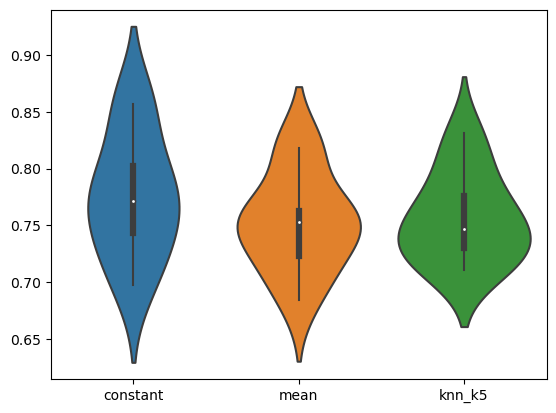

In [49]:
# fig, ax = plt.subplots()
# ax.violinplot(accuracy_knn_k5)
datos_grafico = {'constant':accuracy_constant,'mean':accuracy_mean,'knn_k5':accuracy_knn_k5}
df_grafico = pd.DataFrame(datos_grafico)
sns.violinplot(data=df_grafico)

El gráfico de violín nos muestra que el método más apropiado para este dataset es la imputación para los avlores ausentes de un valor constante = 0.

**1.h. Busca información sobre el fenómeno de data leakage. Haz un pequeño
resumen de un párrafo de la información que hayas obtenido,
especificando de dónde la has obtenido, y pon un ejemplo de caso de uso
en el que se produzca data leakage por no separar convenientemente los
conjuntos de entrenamiento y test.**


EJERCICIO 2

In [ ]:
df_house = pd.read_csv('./housing.csv')
df_house

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_house.drop('ocean_proximity', axis = 1, inplace=True)
df_house.dropna(inplace=True)
y_house = df_house['median_house_value'].values
df_house.drop('median_house_value', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_house, y_house, test_size=0.3, random_state=12)

A)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

columnTransformer = ColumnTransformer([
    ('std_scaler', StandardScaler(), ['longitude', 'latitude']),
    ('pow_scaler', PowerTransformer(method='box-cox'), slice(2, None)),
])

pipeline = Pipeline([
    ('columnTransformer', columnTransformer),
    ('select_k_best', SelectKBest(k=8)),
    ('regression', LinearRegression())
])

tt = TransformedTargetRegressor(regressor=pipeline, transformer = PowerTransformer(method='box-cox'))

tt.fit(X_train, y_train)

B)

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

selectKb = SelectKBest(score_func=f_regression, k=4)

pipeline = Pipeline([
    ('preprocessing', columnTransformer),
    ('feature_selection', selectKb),
    ('regression', LinearRegression())
])

feat_sel_corr = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer(method='box-cox'))

rmse_scores = cross_val_score(feat_sel_corr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print('valores RMSE:', -rmse_scores)
print('Media RMSE:', -rmse_scores.mean())

C)

In [ ]:
feat_sel_corr.fit(X_train, y_train)

variables = pipeline.named_steps['feature_selection'].get_support()

variables

X_train.columns[variables]